<a href="https://colab.research.google.com/github/superbunny38/2021DeepLearning/blob/main/pytorch/Chap_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%8D%94_%EA%B9%8A%EC%9D%B4_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 레이어- 신경망의 기본 블록

In [1]:
from torch.nn import Linear
linear_layer = Linear(in_features = 5, out_features = 3, bias = True)

선형 변환 살펴보기

In [2]:
import torch
from torch.autograd import Variable
inp = Variable(torch.randn(1,5))
linear_layer(inp)

tensor([[ 1.3218, -0.0919, -0.3125]], grad_fn=<AddmmBackward0>)

In [3]:
linear_layer.weight#훈련 가능한 parameter

Parameter containing:
tensor([[ 0.2492,  0.2903, -0.3165, -0.1724, -0.2953],
        [ 0.1413, -0.1368,  0.3251,  0.2242,  0.0446],
        [ 0.0609, -0.1502,  0.0526,  0.1326,  0.1092]], requires_grad=True)

In [4]:
linear_layer.bias

Parameter containing:
tensor([ 0.2886, -0.1998, -0.3391], requires_grad=True)

### 파이토치 비선형 활성화

In [5]:
from torch.nn import ReLU
example_data = Variable(torch.Tensor([[10,2,-1,-1]]))
example_relu = ReLU()
example_relu(example_data)#음수는 0됨

tensor([[10.,  2.,  0.,  0.]])

In [6]:
import torch.nn as nn
class NeuralNetwork(nn.Module):#서브클래싱
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork,self).__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
  
  def forward(self, input):
    out = self.layer1(input)
    out = nn.ReLU(out)
    out = self.layer2(out)
    return out

In [7]:
model = NeuralNetwork(10,10,1)

**손실은 예측이 나쁘면 높아지고, 좋으면 낮아진다**

# what does loss.backward() do?

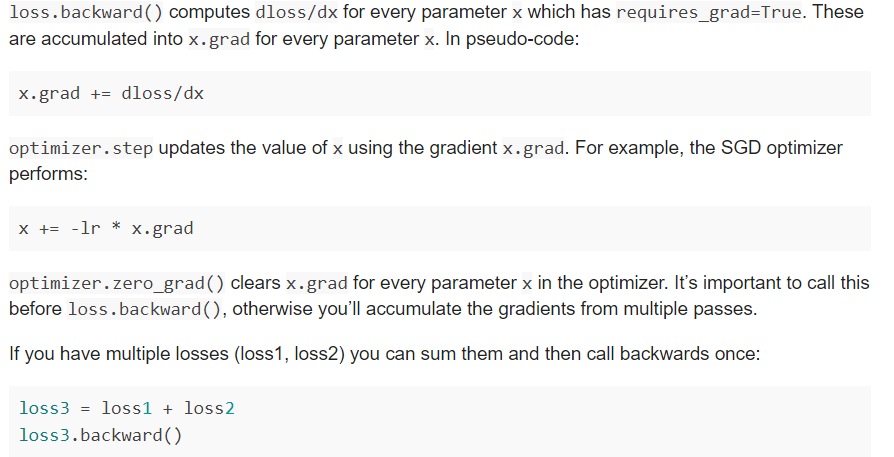

회귀문제

In [8]:
loss = nn.MSELoss()#회귀문제를 위해 일반적으로 사용하는 손실함수인 평균 제곱 오차(MSE, Mean Squared Error)
input = Variable(torch.randn(2,6),requires_grad = True)
target= Variable(torch.randn(2,6))
output = loss(input, target)
print(output)
output.backward()#역전파법
print(output)

tensor(1.7691, grad_fn=<MseLossBackward0>)
tensor(1.7691, grad_fn=<MseLossBackward0>)


# why zero the gradients in pytorch?

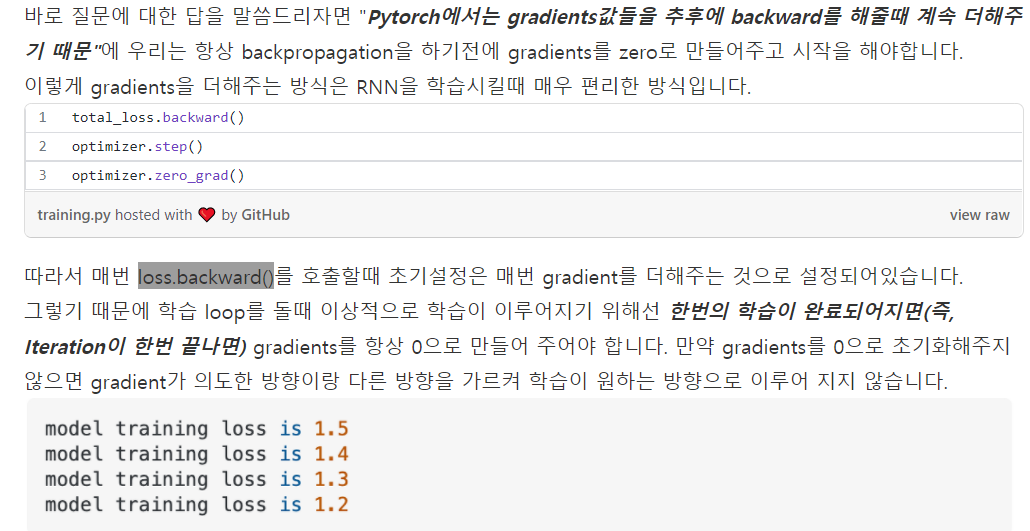

분류문제

In [9]:
def cross_entropy_loss(true_label, prediction):
  if true_label == 1:
    return -log(prediction)
  else:
    return -log(1-prediction)

In [10]:
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(2,6),requires_grad = True)
target= Variable(torch.LongTensor(2).random_(6))

In [11]:
target

tensor([5, 2])

In [12]:
output = loss(input,target)
output.backward()

In [13]:
output

tensor(1.5612, grad_fn=<NllLossBackward0>)

# Optimizer



```
sgd_optimizer = optim.SGD(model.parameters(), lr = 0.01)
```
- model.parameters(): 네트워크의 모든 학습 가능한 parameters
- lr: 학습 가능한 parameters에 대한 변경 비율 결정(학습률)


In [14]:
import torch.optim as optim
sgd_optimizer = optim.SGD(model.parameters(), lr = 0.01)


```
for input, target in dataset:
  sgd_optimizer.zero_grad()#하지 않으면 optimizer을 호출하는 동안 생성된 기울기들을 누적함
  output = model(input)
  loss = loss_fn(output, target)
  loss.backward()
  sgd_optimizer.step()#학습 가능한 parameters을 실제로 변경
```

# 심층 학습을 이용한 이미지 분류

## 데이터 불러와 저장하기

In [15]:
!git clone https://github.com/ardamavi/Dog-Cat-Classifier repo

Cloning into 'repo'...
remote: Enumerating objects: 1654, done.
remote: Total 1654 (delta 0), reused 0 (delta 0), pack-reused 1654
Receiving objects: 100% (1654/1654), 34.83 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [16]:
!mkdir workspace

In [17]:
%mv /content/repo/Data/Train_Data /content/workspace

In [18]:
%cd workspace

/content/workspace


In [20]:
import glob
path = "/content/workspace/Train_Data"
#read all the files inside the folder
dog_files = [f for f in glob.glob("/content/workspace/Train_Data/dog/*.jpg")]
cat_files = [f for f in glob.glob("/content/workspace/Train_Data/cat/*.jpg")]

files = dog_files+cat_files
print(f"Total number of images: {len(files)}")
no_of_images = len(files)

Total number of images: 1399


np.random.permutation 사용법

In [21]:
import numpy as np
n = 3
sh = np.random.permutation(n)#0부터 n-1까지의 번호를 랜덤한 순서로 하나씩 저장
sh

array([1, 2, 0])

In [22]:
shuffle = np.random.permutation(no_of_images)
shuffle

array([ 487,  422,  355, ...,  983, 1158,  194])

In [23]:
len(shuffle)

1399

In [24]:
min(shuffle)

0

In [25]:
max(shuffle)

1398

##### 학습과 검증 이미지들을 저장할 검증 디렉토리 생성

In [26]:
import os
os.mkdir(os.path.join(path, "train"))
os.mkdir(os.path.join(path, "valid"))

레이블 이름으로 디렉토리 생성

In [27]:
for t in ['train','valid']:
  for folder in ['dog/', 'cat/']:
    os.mkdir(os.path.join(path,t,folder))

In [28]:
files[:10]

['/content/workspace/Train_Data/dog/dog.1007.jpg',
 '/content/workspace/Train_Data/dog/dog.43.jpg',
 '/content/workspace/Train_Data/dog/dog.1066.jpg',
 '/content/workspace/Train_Data/dog/dog.1173.jpg',
 '/content/workspace/Train_Data/dog/dog.199.jpg',
 '/content/workspace/Train_Data/dog/dog.1120.jpg',
 '/content/workspace/Train_Data/dog/dog.1099.jpg',
 '/content/workspace/Train_Data/dog/dog.1121.jpg',
 '/content/workspace/Train_Data/dog/dog.65.jpg',
 '/content/workspace/Train_Data/dog/dog.30.jpg']

In [29]:
shuffle[:10]

array([ 487,  422,  355, 1295,  709, 1334,  967,  939,  773,  577])

In [30]:
for i in shuffle[:10]:
  folder = files[i].split("/")[-2].split(".")[0]
  image = files[i].split('/')[-1]
  image = image[4:]
  print(image, end = "      ")
  print(folder)

277.jpg      dog
396.jpg      dog
146.jpg      dog
118.jpg      cat
440.jpg      cat
105.jpg      cat
213.jpg      cat
1059.jpg      cat
492.jpg      cat
158.jpg      dog


In [31]:
path

'/content/workspace/Train_Data'

In [32]:
#검증데이터 넣기
for i in shuffle[:250]:#250개
  folder = files[i].split("/")[-2].split(".")[0]
  image = files[i].split('/')[-1]
  image = image[4:]
  os.rename(files[i], os.path.join(path, 'valid', folder, image))

In [33]:
#학습데이터 넣기
for i in shuffle[250:]:
  folder = files[i].split("/")[-2].split(".")[0]
  image = files[i].split('/')[-1]
  image = image[4:]
  os.rename(files[i], os.path.join(path, 'train', folder, image))

## 파이토치 텐서로 데이터 로딩하기(torchvision.datasets ImageFolder)

**전처리 수행 (transforms 모듈)**

1. 모든 이미지를 같은 크기로 조정한다.
대부분의 심층 학습 아키텍처는 같은 크기로 된 이미지를 필요로 한다.
2. 데이터셋의 평균 및 표준편차를 사용하여 데이터셋 정규화
3. 파이토치 텐서로 이미지 데이터셋 반환

In [34]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),#텐서로 바꾼후
                                transforms.Normalize([0.12,0.11,0.40],[0.89,0.21,0.12])])#평균과 표준편차로 정규화

In [35]:
from torchvision.datasets import ImageFolder
train = ImageFolder("/content/workspace/Train_Data/train", transform)
valid = ImageFolder("/content/workspace/Train_Data/valid", transform)

In [36]:
train.class_to_idx#클래스 관련 인덱스 간의 매핑 제공

{'cat': 0, 'dog': 1}

In [37]:
train.classes#클래스들의 리스트를 제공

['cat', 'dog']

## 데이터 시각화 (비정규화해야함)

In [38]:
import matplotlib.pyplot as plt
def imshow(inp):
  #imshow for tensor
  inp = inp.numpy().transpose((1,2,0))
  mean = np.array([0.12, 0.12, 0.40])
  std = np.array([0.22, 0.20,0.20])
  inp = std*inp+mean
  inp = np.clip(inp,0,1)
  plt.imshow(inp)

In [39]:
train[30]#image, class

(tensor([[[ 0.8037,  0.6803,  0.6891,  ...,  0.2089,  0.0635,  0.1031],
          [ 0.4688,  0.3939,  0.4204,  ...,  0.3543,  0.1516,  0.0679],
          [ 0.5481,  0.5173,  0.5614,  ...,  0.4600,  0.3058,  0.1472],
          ...,
          [ 0.3146,  0.3455,  0.3851,  ...,  0.3410,  0.3322,  0.3278],
          [ 0.2970,  0.3102,  0.3719,  ...,  0.3234,  0.3102,  0.3102],
          [ 0.3322,  0.2794,  0.3234,  ...,  0.3278,  0.3058,  0.2970]],
 
         [[ 3.7526,  3.2297,  3.2297,  ...,  0.5966,  0.0924,  0.2792],
          [ 2.3520,  1.9972,  2.0719,  ...,  1.1755,  0.3912,  0.0551],
          [ 2.6695,  2.5014,  2.6695,  ...,  1.5303,  0.9141,  0.2792],
          ...,
          [ 1.4930,  1.6611,  1.8478,  ...,  1.0822,  1.0635,  1.0635],
          [ 1.4183,  1.5303,  1.7918,  ...,  1.0075,  0.9888,  0.9888],
          [ 1.5677,  1.3996,  1.5864,  ...,  1.0261,  0.9701,  0.9328]],
 
         [[ 3.5294,  2.9085,  3.3987,  ..., -1.7320, -3.0065, -2.7778],
          [ 1.1111,  0.8170,

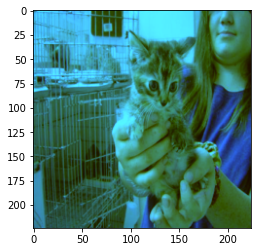

In [40]:
imshow(train[30][0])

### DataLoader 클래스: 데이터셋을 취해서 이미지의 배치를 반환

이미지를 배치로 작업하는 것이 더 빠르게 연산할 수 있다

**shuffle=True: 데이터로더가 호출될 때마다 이미지 셔플**

**num_workers: 병렬화를 담당(코어의 수보다 적은 수 사용해야 함)**
```
#DataLoader로 변환
train_data_generator = torch.utils.data.DataLoader(train, shuffle = True, batch_size = 64, num_workers = 8)
valid_data_generator = torch.utils.data.DataLoader(valid, batch_size = 64, num_workers=8)
```



In [41]:
#DataLoader로 변환
train_data_generator = torch.utils.data.DataLoader(train, shuffle = True, batch_size = 64, num_workers = 8)
valid_data_generator = torch.utils.data.DataLoader(valid, batch_size = 64, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [49]:
train_data_generator.dataset

Dataset ImageFolder
    Number of datapoints: 1149
    Root location: /content/workspace/Train_Data/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.12, 0.11, 0.4], std=[0.89, 0.21, 0.12])
           )

In [50]:
valid_data_generator.dataset

Dataset ImageFolder
    Number of datapoints: 250
    Root location: /content/workspace/Train_Data/valid
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.12, 0.11, 0.4], std=[0.89, 0.21, 0.12])
           )

In [51]:
len(train_data_generator.dataset)

1149

In [53]:
dataset_sizes = {'train':len(train_data_generator.dataset),'valid':len(valid_data_generator.dataset)}

In [55]:
dataloaders = {'train':train_data_generator,'valid':valid_data_generator}

### pre-trained model

In [74]:
import torchvision.models as models
pretrained_resnet =models.resnet18(pretrained=True)
number_features = pretrained_resnet.fc.in_features
number_features

512

In [75]:
from torchsummary import summary
print(pretrained_resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [76]:
pretrained_resnet.fc

Linear(in_features=512, out_features=1000, bias=True)

In [77]:
pretrained_resnet.fc = nn.Linear(number_features, 2)#마지막 레이어 변형

In [78]:
try:
  pretrained_resnet = pretrained_resnet.cuda()#파이토치에 GPU에서 코드를 실행하도록 명력
except:
  print("no cuda")

## 모델 학습하기
**StepLR함수는 학습률을 동적으로 변경하도록 해준다**

In [79]:
import torch.optim.lr_scheduler as lr_scheduler
learning_rate = 0.005
criterion = nn.CrossEntropyLoss()
fit_optimizer = optim.SGD(pretrained_resnet.parameters(), lr = 0.005, momentum = 0.6)
exp_learning_rate_scheduler = lr_scheduler.StepLR(fit_optimizer, step_size =2, gamma = 0.05)

In [80]:
import time
def train_my_model(model, criterion, optimizer, scheduler, number_epochs = 20):
  train_acc_list = []
  valid_acc_list = []
  since = time.time()
  best_model_weights = model.state_dict()
  best_accuracy = 0.0
  for epoch in range(number_epochs):
    print("-"*10)
    print("Epoch {}/{}".format(epoch, number_epochs -1))

    # Each epoch has a training and validation phase
    for each_phase in ['train','valid']:
      if each_phase == 'train':
        scheduler.step()
        model.train(True)
      else:
        model.train(False)

      running_loss = 0.0
      running_corrects = 0

      # Iterate over data
      for data in dataloaders[each_phase]:
        input_data, label_data = data

        if torch.cuda.is_available():
          input_data = Variable(input_data.cuda())
          label_data = Variable(label_data.cuda())
        else:
          input_data, label_data = Variable(input_data), Variable(label_data)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        #forward
        outputs = model(input_data)
        _, preds = torch.max(outputs.data,1)
        loss = criterion(outputs, label_data)

        if each_phase == 'train':# backward + optimize only if in training phase
          loss.backward()
          optimizer.step()
        #print(loss.data)
        running_loss+=loss.data#loss.data[0]
        running_corrects += torch.sum(preds == label_data.data)
      
      epoch_loss = running_loss/dataset_sizes[each_phase]
      epoch_acc = running_corrects/dataset_sizes[each_phase]
      print("{} Loss: {:.4f} Acc: {:.4f}".format(each_phase, epoch_loss, epoch_acc))
      if each_phase == 'valid':
        valid_acc_list.append(epoch_acc)
      else:
        train_acc_list.append(epoch_acc)

      if each_phase == 'valid' and epoch_acc > best_accuracy:
        best_accuracy = epoch_acc
        best_model_weights = model.state_dict()

  print()
  time_elapsed = time.time()-since
  print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed//60, time_elapsed%60))
  print("Best Val Acc: {:.4f}".format(best_accuracy))
  model.load_state_dict(best_model_weights)
  return model, train_acc_list, valid_acc_list

In [81]:
model, train_acc, valid_acc = train_my_model(pretrained_resnet, criterion, fit_optimizer, exp_learning_rate_scheduler, number_epochs=20)

----------
Epoch 0/19


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_che

train Loss: 0.0058 Acc: 0.8407
valid Loss: 0.0022 Acc: 0.9680
----------
Epoch 1/19
train Loss: 0.0019 Acc: 0.9765
valid Loss: 0.0022 Acc: 0.9720
----------
Epoch 2/19
train Loss: 0.0020 Acc: 0.9765
valid Loss: 0.0022 Acc: 0.9840
----------
Epoch 3/19
train Loss: 0.0018 Acc: 0.9817
valid Loss: 0.0022 Acc: 0.9800
----------
Epoch 4/19
train Loss: 0.0020 Acc: 0.9756
valid Loss: 0.0022 Acc: 0.9800
----------
Epoch 5/19
train Loss: 0.0019 Acc: 0.9774
valid Loss: 0.0022 Acc: 0.9800
----------
Epoch 6/19
train Loss: 0.0018 Acc: 0.9782
valid Loss: 0.0022 Acc: 0.9840
----------
Epoch 7/19
train Loss: 0.0019 Acc: 0.9765
valid Loss: 0.0022 Acc: 0.9840
----------
Epoch 8/19
train Loss: 0.0018 Acc: 0.9782
valid Loss: 0.0022 Acc: 0.9800
----------
Epoch 9/19
train Loss: 0.0018 Acc: 0.9791
valid Loss: 0.0022 Acc: 0.9840
----------
Epoch 10/19
train Loss: 0.0019 Acc: 0.9800
valid Loss: 0.0022 Acc: 0.9800
----------
Epoch 11/19
train Loss: 0.0019 Acc: 0.9748
valid Loss: 0.0022 Acc: 0.9840
----------
E

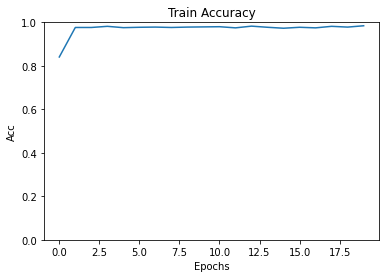

In [84]:
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.plot(train_acc)
plt.ylim(0,1)
plt.show()

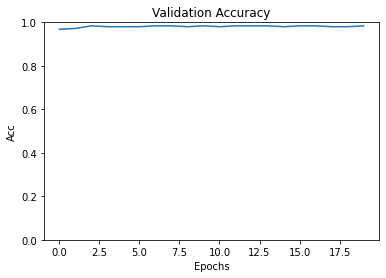

In [85]:
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.plot(valid_acc)
plt.ylim(0,1)
plt.show()